<a href="https://colab.research.google.com/github/PhuongTa/hocmay/blob/main/Chapter_3_Classification_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import f1_score

random_state=42

# Khai báo các biến thư mục dự án
PROJECT_ROOT_DIR="drive/MyDrive/HOCMAY/working/"
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok= True)


In [ ]:
# Function save figure
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("saving figure..." + fig_id)

    if tight_layout:
        plt.tight_layout()

    plt.savefig(path, format=fig_extension, dpi= resolution)


# Load MNIST Database

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml(
    'mnist_784', version=1, as_frame= False
)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

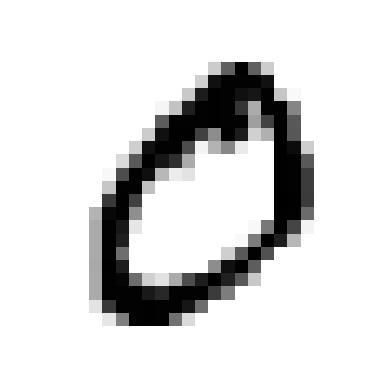

In [ ]:
some_digit = X[1]

some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

plt.axis("off")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Câu 1: Bộ phân loại MNIST với độ chính xác 97%

Xây dựng một bộ phân loại cho tập dữ liệu MNIST có *độ chính xác trên 97% trên tập kiểm tra. *

*Gợi ý*: *KNeighborsClassifier* hoạt động tốt cho tác vụ này. Bạn chỉ cần tìm những giá trị siêu tham số phù hợp (hãy thử tìm kiếm dạng lưới với hai siêu tham số weights và *n_neighbors*)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{
     'weights':['uniform',"distance"],
     'n_neighbors': [3,4,5]
     }]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  41.9s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  47.4s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  32.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  33.1s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  32.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  31.5s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  31.5s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  33.2s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  32.1s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  31.6s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  31.8s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9716166666666666

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)

accuracy_score(y_test, y_pred)

0.9714

# Câu 2: Tăng cường dữ liệu nhân tạo (Data Augmentation) / Mở rộng tập huấn luyện (Training Set Expansion)